# Assignment


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('carprice.csv')

In [4]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,...,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,...,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,...,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


# Question 
Give me some insights from this data. (Totally open ended, dazzle me with your brilliance ^_^ )

Find me something meaningful that will help me as a business owner. 

![](https://media.giphy.com/media/3oEjHAWsCGowjkc3Ha/giphy.gif)

# Answer

# EDA
EDA stands for Exploratory Data Analysis. It is an approach used to analyze and summarize the main characteristics of a dataset, usually with the help of statistical methods and visualizations. EDA is used to understand the patterns, relationships, and distributions present in a dataset, as well as to identify outliers, missing values, and other anomalies.

EDA is typically the first step in any data analysis project, as it allows data scientists to gain a better understanding of the data they are working with before moving on to more complex analyses. By performing EDA, data scientists can make informed decisions about which statistical methods and machine learning algorithms to use, as well as identify potential issues with the data that need to be addressed before further analysis can take place.

---

Let's go column by column

# Categorical columns

In [31]:
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,...,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0


In [5]:
df['fueltype'].value_counts()

gas       133
diesel     17
Name: fueltype, dtype: int64

<AxesSubplot: title={'center': 'Which Fuel type ?'}>

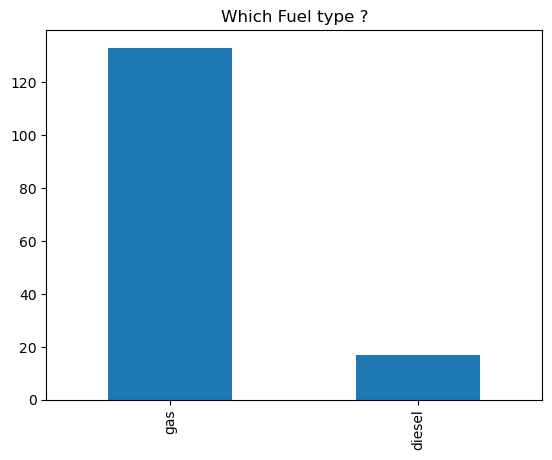

In [92]:
df['fueltype'].value_counts().plot(kind='bar',title='Which Fuel type ?')

### Doing this for all categorical columns will be tiring, i am writing a loop

In [30]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [117]:
cat_columns = ['symboling', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation',
               'enginetype', 'cylindernumber', 'fuelsystem', 'carbody']

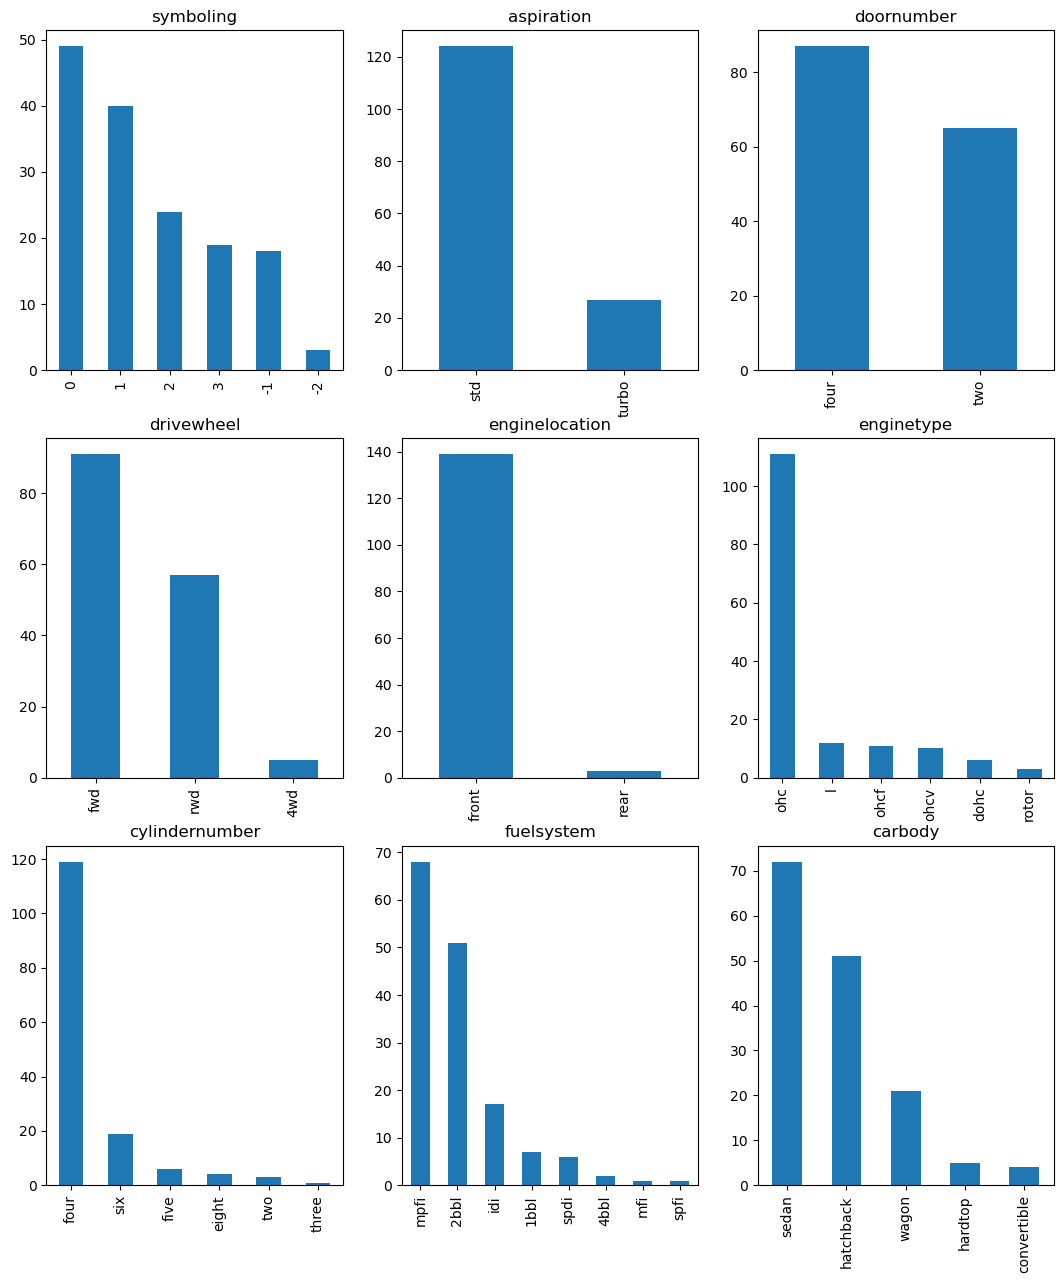

In [140]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(13)


for i in range(len(cat_columns)):
    plt.subplot(3, 3, i+1)
    df[cat_columns[i]].value_counts().plot(kind='bar', title=f'{cat_columns[i]}')


plt.show()

### Now, here i can write a whole page worth of insights
- Most of our symbolins is o
- The aspiration for most is std.
- More cars have 4 doors, but the difference is not much, it is 60-40 ish
- and on and on

You could have done pie charts

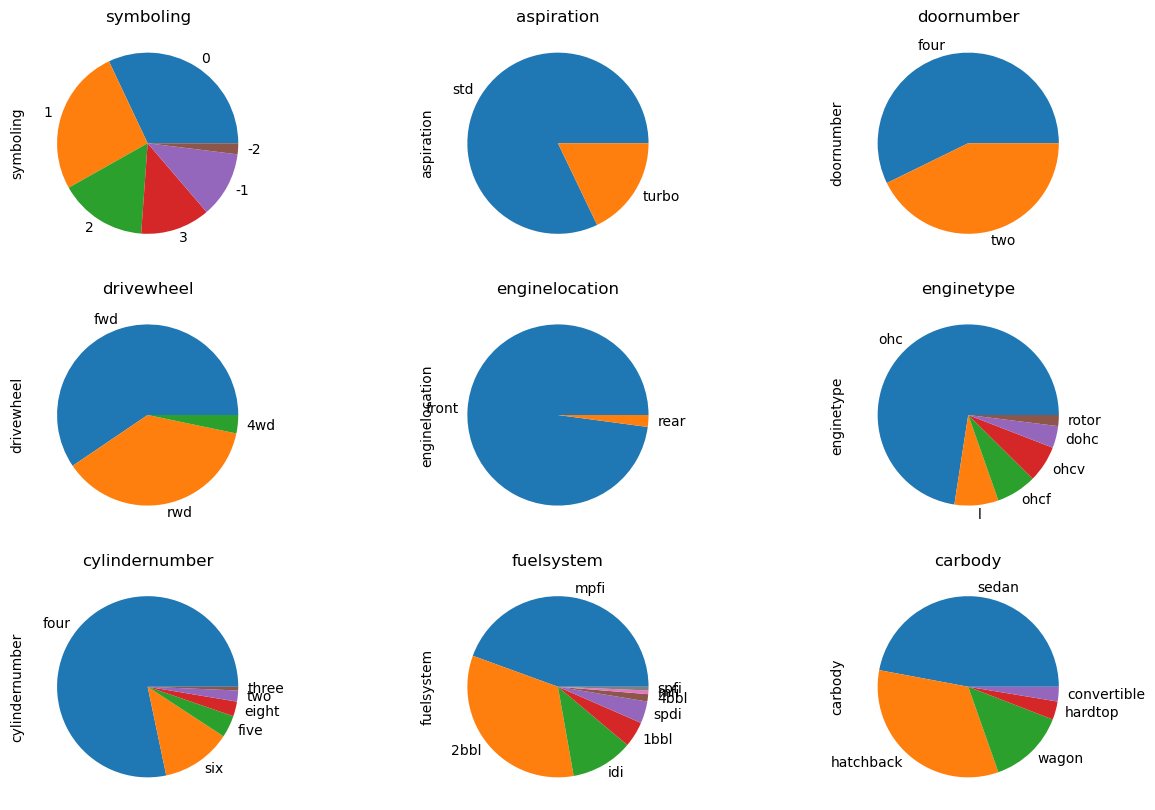

In [120]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.set_figheight(10)
fig.set_figwidth(15)


for i in range(len(cat_columns)):
    plt.subplot(3, 3, i+1)
    df[cat_columns[i]].value_counts().plot(kind='pie', title=f'{cat_columns[i]}')


plt.show()

# Numerical Columns

In [121]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,153.000000,151.000000,150.000000,149.000000,151.000000,152.000000,153.000000,151.000000,150.000000,151.000000,153.000000,146.000000,150.000000,150.000000,153.000000
mean,0.790850,98.970199,174.342667,65.997987,53.774172,2574.019737,127.647059,3.342185,3.267167,10.217351,102.888889,5096.232877,25.360000,30.960000,13364.157954
std,1.259979,6.384991,12.971747,2.077826,2.493791,541.390991,42.015265,0.266828,0.310188,4.110621,37.950895,456.186804,6.794471,7.259227,8302.558158
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.925000,64.200000,52.000000,2143.750000,97.000000,3.140000,3.127500,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.600000,54.100000,2434.000000,120.000000,3.350000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10698.000000
75%,2.000000,102.800000,184.600000,67.200000,55.700000,3036.000000,145.000000,3.595000,3.410000,9.405000,116.000000,5400.000000,30.000000,36.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,207.000000,6000.000000,49.000000,54.000000,45400.000000


In [128]:
num_columns = ['symboling','wheelbase','carlength','carwidth',
               'carheight','curbweight','enginesize','boreratio',
               'stroke','compressionratio','horsepower','peakrpm',
               'citympg','highwaympg','price']

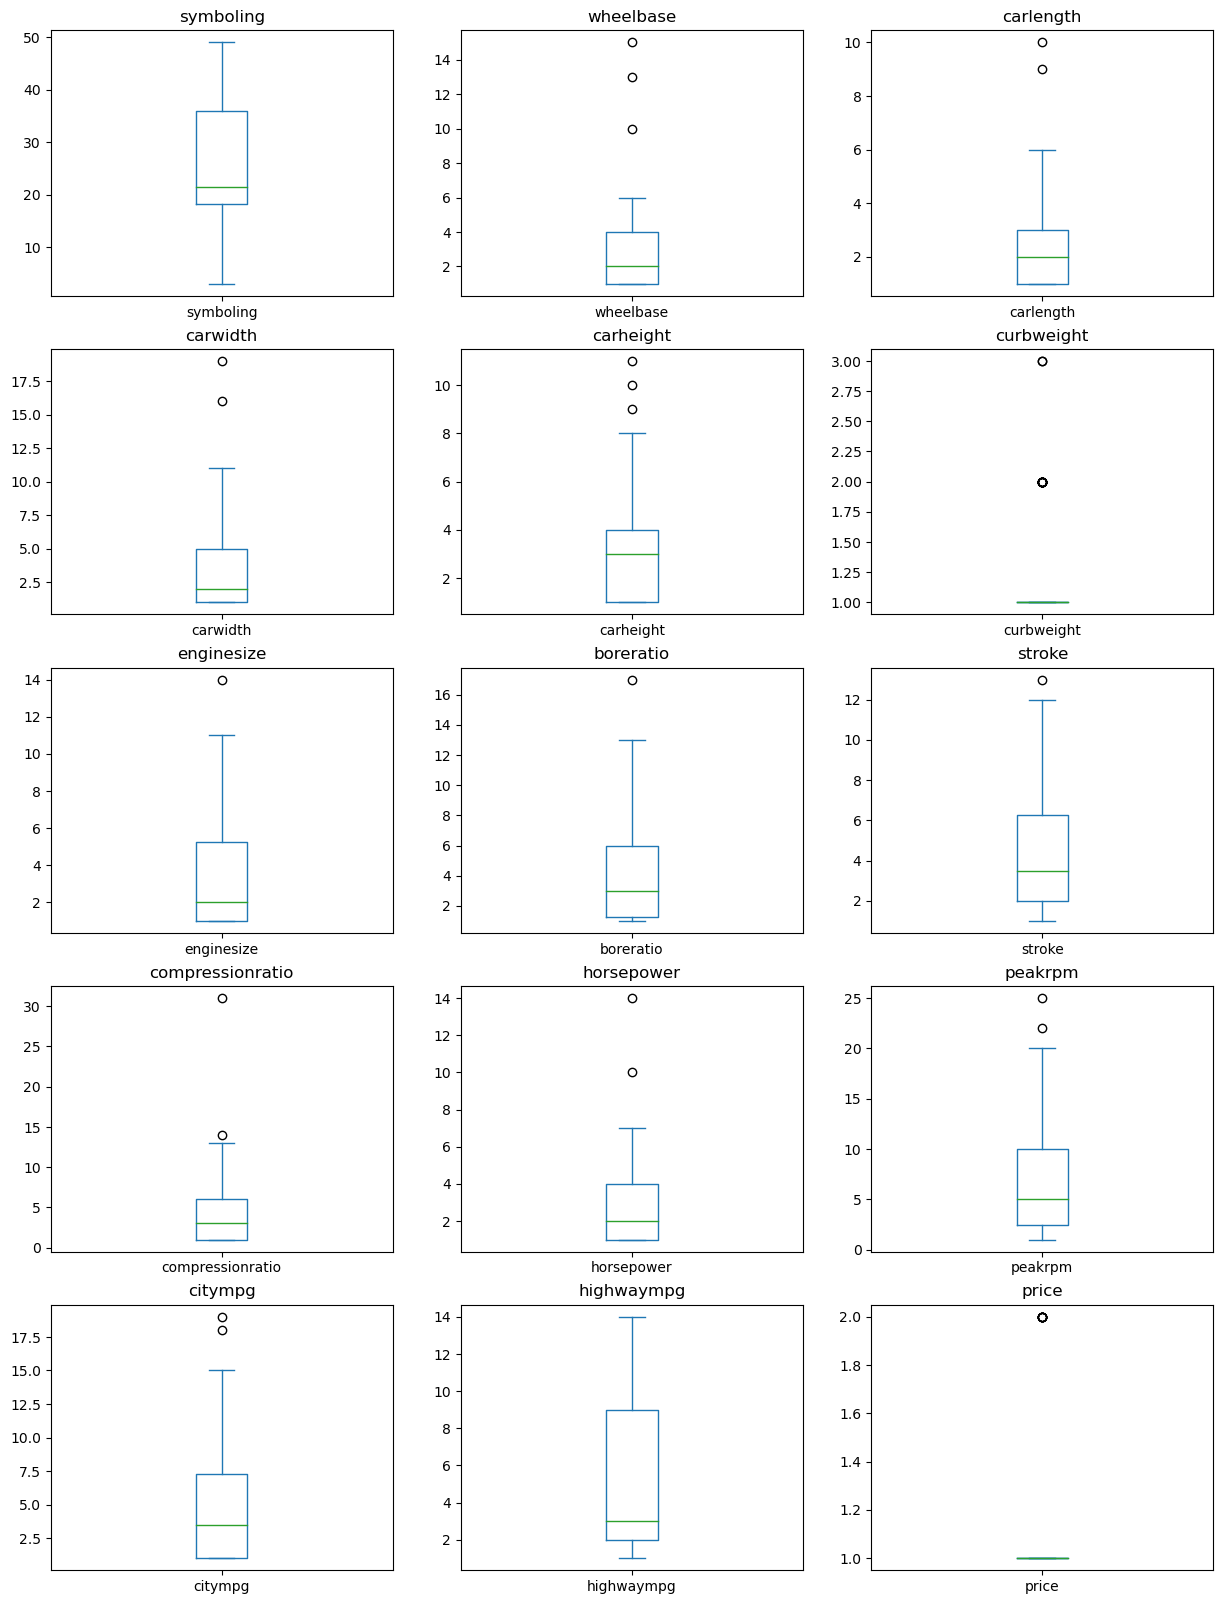

In [142]:
fig, axs = plt.subplots(5, 3)
fig.set_figheight(20)
fig.set_figwidth(15)


for i in range(len(num_columns)):
    plt.subplot(5, 3, i+1)
    df[num_columns[i]].value_counts().plot(kind='box', title=f'{num_columns[i]}')


plt.show()

# And, i can write on and on and on......

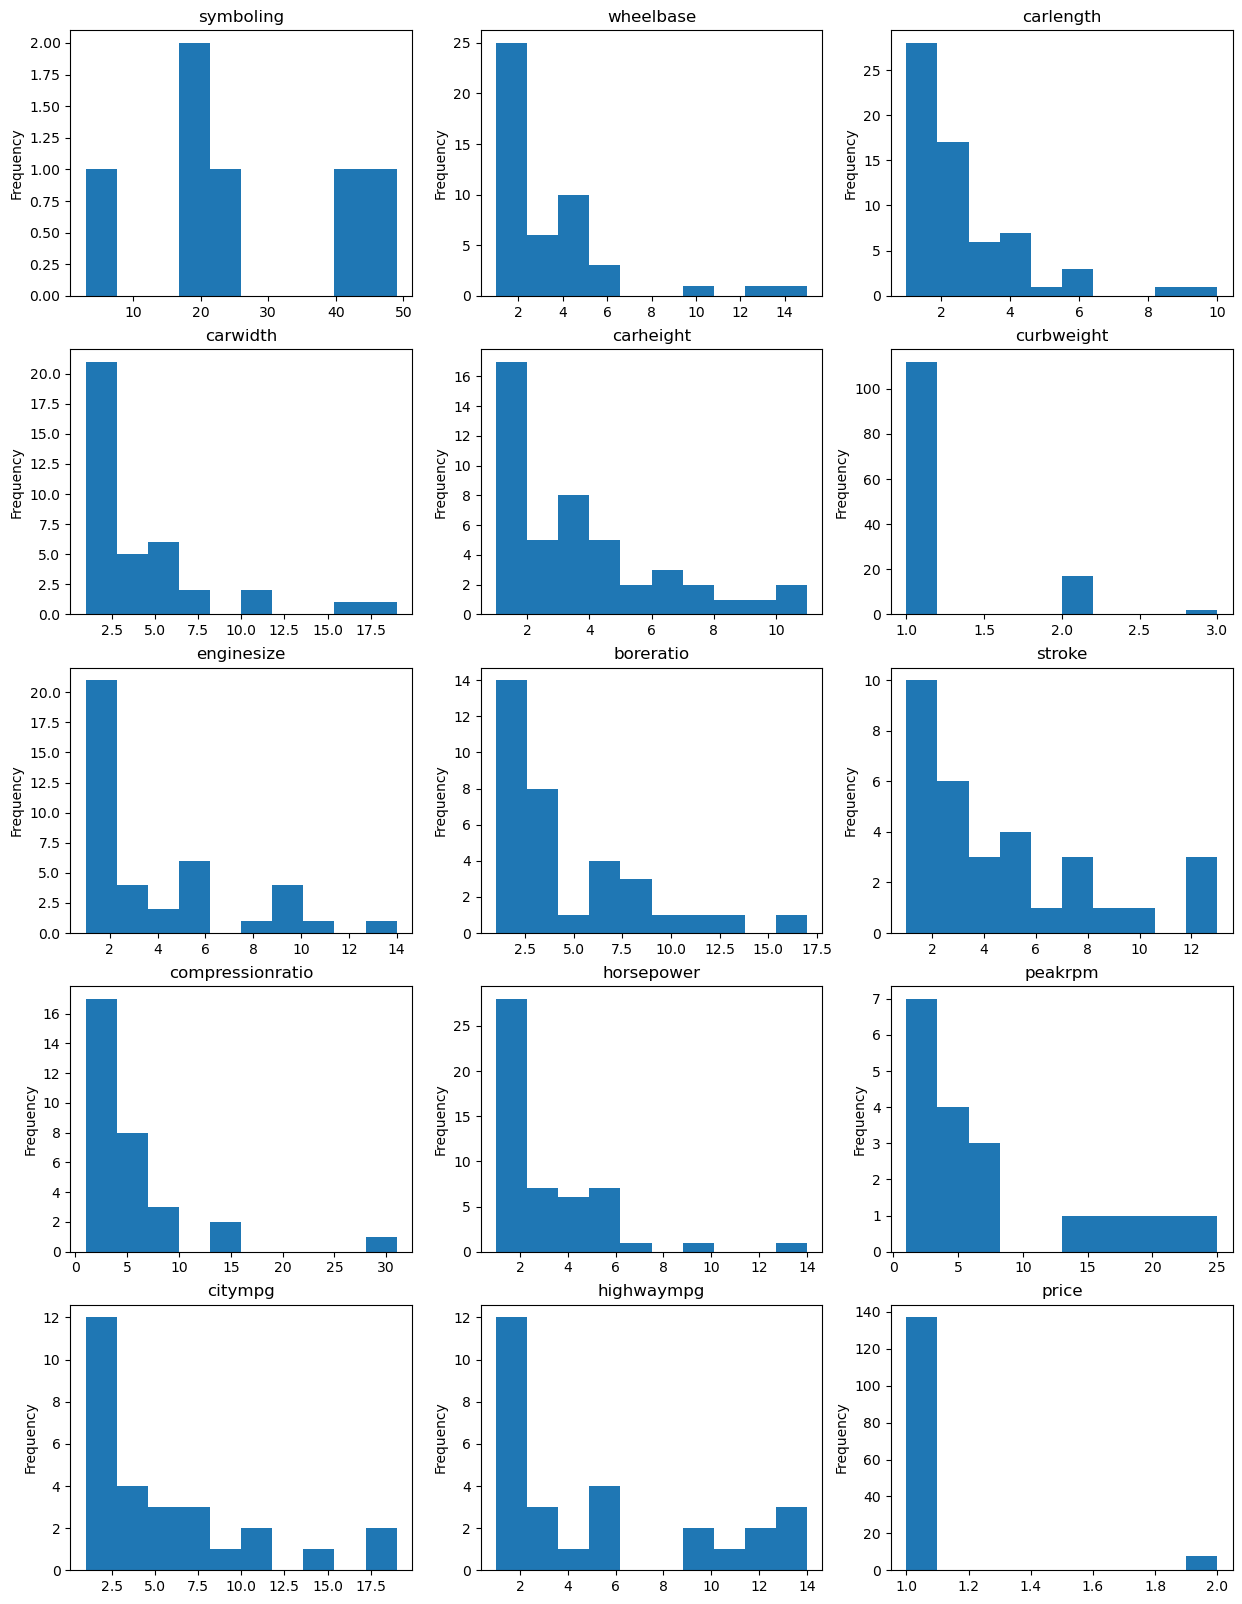

In [158]:
fig, axs = plt.subplots(5, 3)
fig.set_figheight(20)
fig.set_figwidth(15)


for i in range(len(num_columns)):
    plt.subplot(5, 3, i+1)
    df[num_columns[i]].value_counts().plot(kind='hist', title=f'{num_columns[i]}')


plt.show()

# Uptill now, we have only done univariate analysis

# Heatmaps 

In [145]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.551201,-0.383470,-0.242665,-0.601380,-0.236977,-0.079449,-0.107170,0.028847,-0.215635,0.087290,0.319939,-0.021948,0.050119,-0.053059
wheelbase,-0.551201,1.000000,0.882033,0.810738,0.607544,0.784367,0.578227,0.500669,0.156859,0.232750,0.352040,-0.396600,-0.476294,-0.562060,0.549483
carlength,-0.383470,0.882033,1.000000,0.866678,0.503397,0.883286,0.695210,0.660219,0.149959,0.114189,0.563351,-0.323860,-0.683373,-0.725075,0.663895
carwidth,-0.242665,0.810738,0.866678,1.000000,0.344851,0.876509,0.750035,0.584719,0.209609,0.124876,0.619986,-0.280955,-0.674329,-0.726466,0.737575
carheight,-0.601380,0.607544,0.503397,0.344851,1.000000,0.338243,0.134504,0.221025,-0.096859,0.244944,-0.051715,-0.342354,-0.062768,-0.136964,0.144977
curbweight,-0.236977,0.784367,0.883286,0.876509,0.338243,1.000000,0.845824,0.693293,0.199977,0.112944,0.747940,-0.273141,-0.763997,-0.812236,0.810280
enginesize,-0.079449,0.578227,0.695210,0.750035,0.134504,0.845824,1.000000,0.634842,0.266312,-0.009532,0.815814,-0.226361,-0.662018,-0.699006,0.878902
boreratio,-0.107170,0.500669,0.660219,0.584719,0.221025,0.693293,0.634842,1.000000,-0.097728,0.010477,0.606855,-0.242662,-0.635716,-0.648609,0.577615
stroke,0.028847,0.156859,0.149959,0.209609,-0.096859,0.199977,0.266312,-0.097728,1.000000,0.160432,0.147254,-0.128265,-0.082157,-0.076550,0.096792
compressionratio,-0.215635,0.232750,0.114189,0.124876,0.244944,0.112944,-0.009532,0.010477,0.160432,1.000000,-0.257805,-0.481905,0.317417,0.274963,0.011907


([<matplotlib.axis.YTick at 0x7fa12a33c460>,
 [Text(0, 0, 'symboling'),
  Text(0, 1, 'wheelbase'),
  Text(0, 2, 'carlength'),
  Text(0, 3, 'carwidth'),
  Text(0, 4, 'carheight'),
  Text(0, 5, 'curbweight'),
  Text(0, 6, 'enginesize'),
  Text(0, 7, 'boreratio'),
  Text(0, 8, 'stroke'),
  Text(0, 9, 'compressionratio'),
  Text(0, 10, 'horsepower'),
  Text(0, 11, 'peakrpm'),
  Text(0, 12, 'citympg'),
  Text(0, 13, 'highwaympg'),
  Text(0, 14, 'price')])

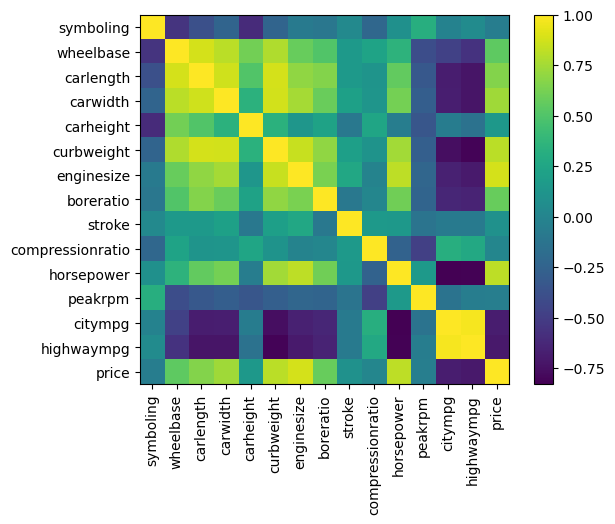

In [157]:
df_corr = df.corr()

plt.imshow(df_corr)
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns, rotation = 90)
plt.yticks(range(len(df_corr)), df_corr.index)

# So much to write, so much ............

![](https://media.giphy.com/media/hhzuf74FLARRD8YgIG/giphy.gif)

# Missing values

In [159]:
df.isna().sum()

symboling            0
CarName              0
fueltype             3
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
dtype: int64

<AxesSubplot: >

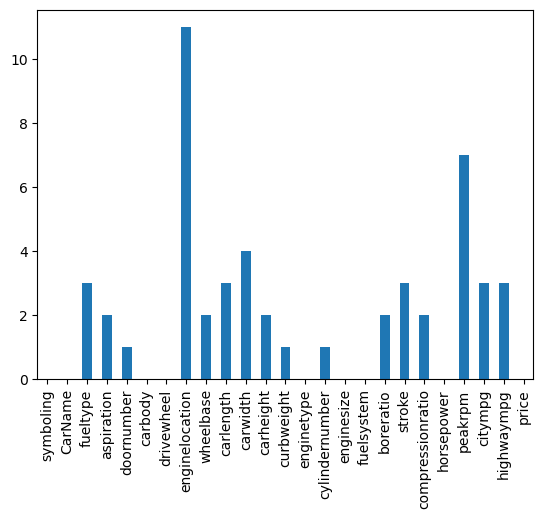

In [160]:
df.isna().sum().plot(kind='bar')

# How to treat them  

The most simple approach would be:-
- To fill with mean for numerical variable
- To fill with mode for categorical variable

In [163]:
df['fueltype']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
148       NaN
149       gas
150    diesel
151       gas
152    diesel
Name: fueltype, Length: 153, dtype: object

In [179]:
df['fueltype'].mode()

0    gas
Name: fueltype, dtype: object

In [184]:
df['fueltype'].mode().values[0]

'gas'

In [166]:
df['fueltype'].fillna(df['fueltype'].mode())

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
148       NaN
149       gas
150    diesel
151       gas
152    diesel
Name: fueltype, Length: 153, dtype: object

I will have to save this output somewhere, preferrably overwriting the previous column, like this 


```df['fueltype'] = df['fueltype'].fillna(df['fueltype'].mode())```

If not this, i can use the ```inplace``` parameter.

In [185]:
df['fueltype'].fillna(df['fueltype'].mode().values[0], inplace=True)

<AxesSubplot: >

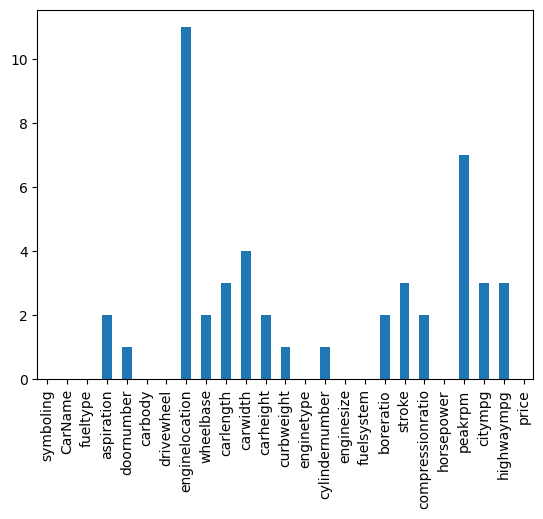

In [186]:
df.isna().sum().plot(kind='bar')

### Similarly, other columns can also be filled.

In [187]:
df['aspiration'].fillna(df['aspiration'].mode().values[0], inplace=True)

<AxesSubplot: >

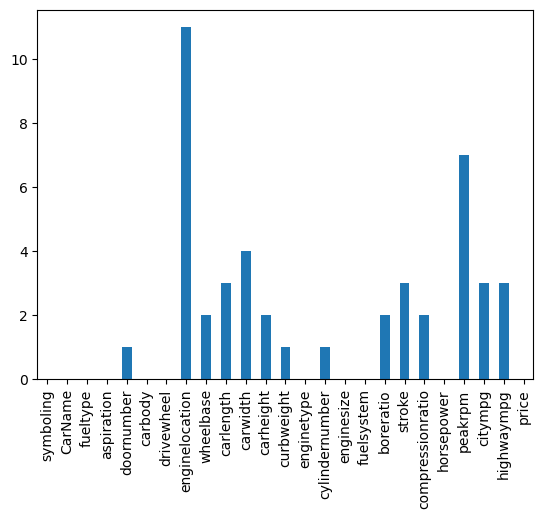

In [188]:
df.isna().sum().plot(kind='bar')

In [189]:
df['doornumber'].fillna(df['doornumber'].mode().values[0], inplace=True)

<AxesSubplot: >

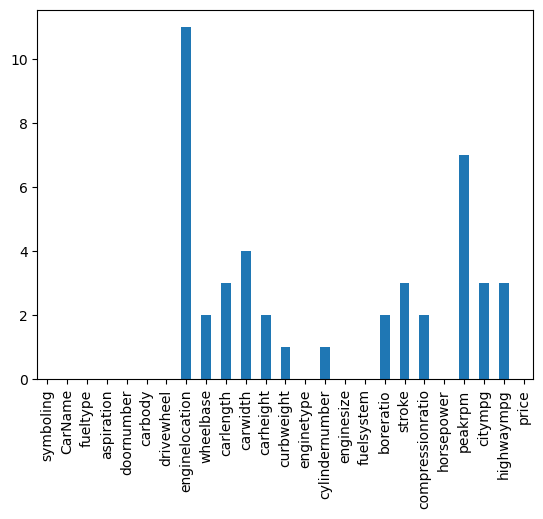

In [190]:
df.isna().sum().plot(kind='bar')

In [189]:
df['doornumber'].fillna(df['doornumber'].mode().values[0], inplace=True)

<AxesSubplot: >

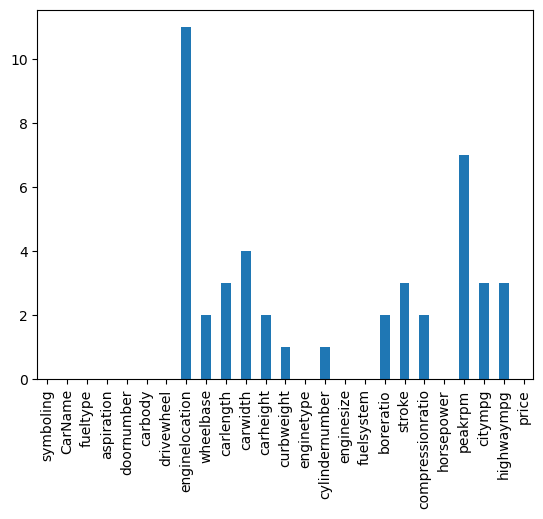

In [190]:
df.isna().sum().plot(kind='bar')